# Monte Carlo Simulation for FE
## IEOR 4703

### An example of the discretization of the Hamiltonian dynamics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

import math

In [2]:
n = 400 # there will be overflow with values larger than 1500
L = 10
#e = math.pi/100
e = 0.02783
m = 1

### Euler Method

<>:36: SyntaxWarning: invalid escape sequence '\e'
<>:36: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-2710535984.py:36: SyntaxWarning: invalid escape sequence '\e'
  plt.title('Euler Method, $\epsilon$ =' + str(e))


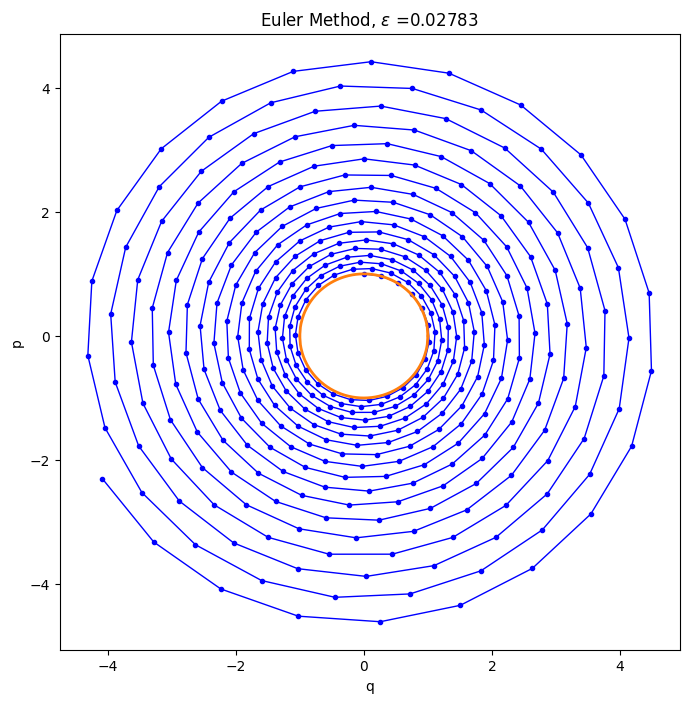

In [3]:
x = np.arange(-1., 1.01, 0.01)
y = np.sqrt(np.abs(1 - x**2))

# Euler Method

q1 = np.zeros(n+1)
p1 = np.zeros(n+1)

q1[0] = 0
p1[0] = 1

for i in range(1, n+1):
    p_old = p1[i-1]
    q_old = q1[i-1]
    for j in range(L):
        p_new = p_old - e * q_old
        q_new = q_old + e * p_old/m;

        p_old = p_new
        q_old = q_new

    p1[i] = p_new
    q1[i] = q_new

# there can be overflow, so we only keep the finite values
lim = np.max(np.where(np.isfinite(p1)))
q1 = q1[:lim]
p1 = p1[:lim]

plt.figure(figsize=(8, 8))
plt.plot(q1, p1, '.',  linestyle='-', color='b', linewidth=1)
plt.plot(x, y, color='C1', linewidth=2)
plt.plot(x, -y, color='C1', linewidth=2)
plt.xlabel('q')
plt.ylabel('p')
plt.title('Euler Method, $\epsilon$ =' + str(e))
plt.show()

### Modified Euler

<>:29: SyntaxWarning: invalid escape sequence '\e'
<>:29: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-1216368768.py:29: SyntaxWarning: invalid escape sequence '\e'
  plt.title('Modified Euler Method, $\epsilon$ =' + str(e))


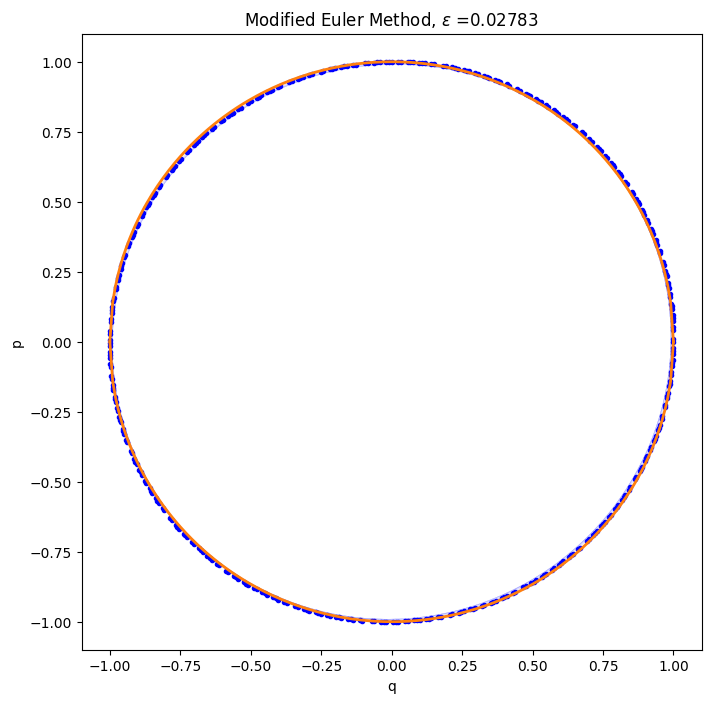

In [4]:
q2 = np.zeros(n+1)
p2 = np.zeros(n+1)

q2[0] = 0
p2[0] = 1

for i in range(1, n+1):

    p_old = p2[i-1]
    q_old = q2[i-1]

    for j in range(L):

        p_new = p_old - e * q_old
        q_new = q_old + e * p_new/m;

        p_old = p_new
        q_old = q_new

    p2[i] = p_new
    q2[i] = q_new

plt.figure(figsize=(8, 8))
plt.plot(q2, p2, '.',  linestyle='-', color='b', linewidth=0.02)
plt.plot(x, y, color='C1', linewidth=2)
plt.plot(x, -y, color='C1', linewidth=2)
plt.xlabel('q')
plt.ylabel('p')
plt.title('Modified Euler Method, $\epsilon$ =' + str(e))
plt.show()

### Leapfrog Method

<>:31: SyntaxWarning: invalid escape sequence '\e'
<>:31: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-439314202.py:31: SyntaxWarning: invalid escape sequence '\e'
  plt.title('Leapfrog Method, $\epsilon$ =' + str(e))


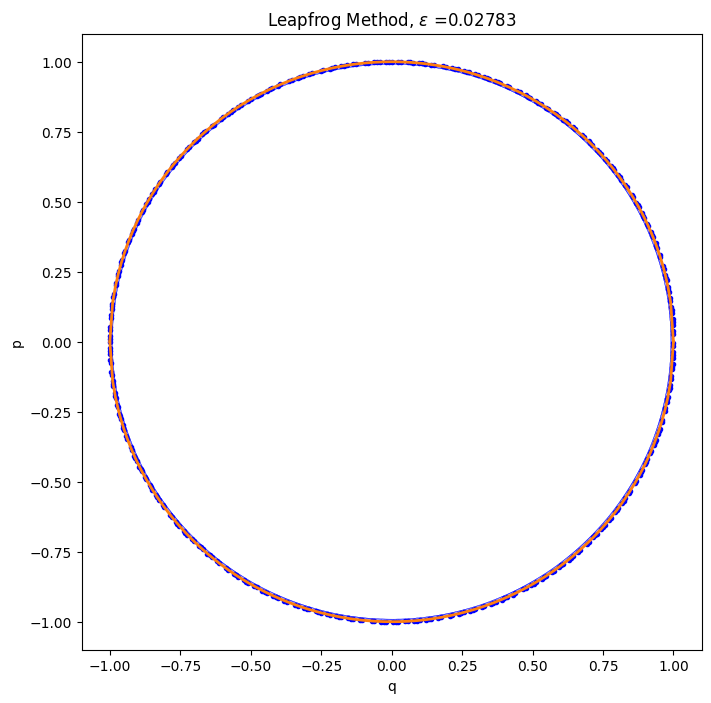

In [5]:
q3 = np.zeros(n+1)
p3 = np.zeros(n+1)

q3[0] = 0
p3[0] = 1

for i in range(1, n+1):

    p_old = p3[i-1]
    q_old = q3[i-1]

    for j in range(L):
        p_new = p_old - 0.5*e*q_old;
        q_new = q_old + e * p_new/m;
        p_new = p_new - 0.5*e*q_new;

        p_old = p_new;
        q_old = q_new;


    p3[i] = p_new
    q3[i] = q_new


plt.figure(figsize=(8, 8))
plt.plot(q3, p3, '.',  linestyle='-', color='b', linewidth=0.05)
plt.plot(x, y, color='C1', linewidth=2)
plt.plot(x, -y, color='C1', linewidth=2)
plt.xlabel('q')
plt.ylabel('p')
plt.title('Leapfrog Method, $\epsilon$ =' + str(e))
plt.show()

<>:33: SyntaxWarning: invalid escape sequence '\e'
<>:33: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-1225955771.py:33: SyntaxWarning: invalid escape sequence '\e'
  plt.title('Modified Euler Method, $\epsilon$ =' + str(e))


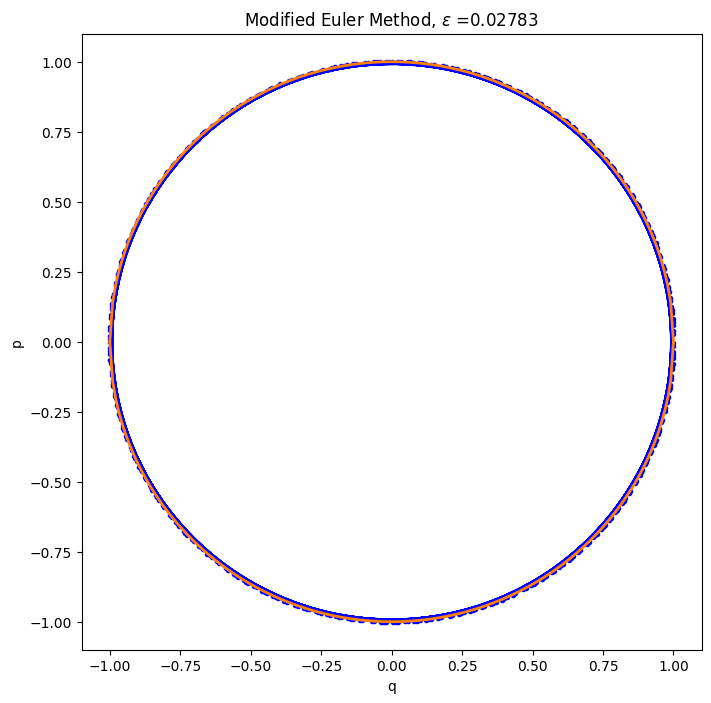

In [6]:
q3 = np.zeros(n+1)
p3 = np.zeros(n+1)

q3[0] = 0
p3[0] = 1

for i in range(1, n+1):

    p_old = p3[i-1]
    q_old = q3[i-1]

    for j in range(L):

        q_new = q_old + 0.5*e*p_old/m
        p_new = p_old - e*q_new
        q_new = q_new   + 0.5*e*p_new

        p_old = p_new;
        q_old = q_new;


    p3[i] = p_new
    q3[i] = q_new



plt.figure(figsize=(8, 8))
plt.plot(q3, p3, '.',  linestyle='-', color='b', linewidth=1)
plt.plot(x, y, color='C1', linewidth=2)
plt.plot(x, -y, color='C1', linewidth=2)
plt.xlabel('q')
plt.ylabel('p')
plt.title('Modified Euler Method, $\epsilon$ =' + str(e))
plt.show()